# 캘리포니아 어바인 대학에서 제공하는 와인 데이터세트를 이용한  
# 레드 와인, 화이트 와인 분류 문제

## 이항 분류

In [1]:
# 와인 데이터세트 불러오기

import pandas as pd
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [2]:
# 와인 데이터셋 합치기

# 데이터셋에 새로운 속성 추가하기
red['type'] = 0
white['type'] = 1
print(red.head(2))
print(white.head(2))

# 두 개의 데이터프레임 합치기
wine = pd.concat([red, white])
print(wine.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  type  
0      9.4        5     0  
1      9.8        5     0  
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   
1                 14.0                 132.0    0.994  3.3       0.49   

   

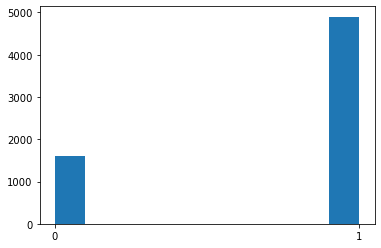

1    4898
0    1599
Name: type, dtype: int64


In [3]:
# 레드 와인과 화이트 와인 type 히스토그램

import matplotlib.pyplot as plt

plt.hist(wine['type'])
plt.xticks([0,1])
plt.show()

print(wine['type'].value_counts())

훈련 데이터와 테스트 데이터로 나누기 전에 레드 와인과 화이트 와인이 비슷한 비율로 들어가도록 데이터를 한 번 랜덤하게 섞어야 함.

데이터를 섞기 전에 데이터 정규화가 필요함

In [4]:
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


In [5]:
# 데이터 정규화

wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
print(wine_norm.head())
print(wine_norm.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.297521          0.413333     0.000000        0.019939   0.111296   
1       0.330579          0.533333     0.000000        0.030675   0.147841   
2       0.330579          0.453333     0.024096        0.026074   0.137874   
3       0.611570          0.133333     0.337349        0.019939   0.109635   
4       0.297521          0.413333     0.000000        0.019939   0.111296   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.034722              0.064516  0.206092  0.612403   0.191011   
1             0.083333              0.140553  0.186813  0.372093   0.258427   
2             0.048611              0.110599  0.190669  0.418605   0.241573   
3             0.055556              0.124424  0.209948  0.341085   0.202247   
4             0.034722              0.064516  0.206092  0.612403   0.191011   

    alcohol   quality  type  
0  0.202899  0.333333   0.

In [6]:
# 데이터를 섞은 다음 numpy array로 변환

import numpy as np

wine_shuffle = wine_norm.sample(frac=1)
print(wine_shuffle.head())
wine_np = wine_shuffle.to_numpy()
print(wine_np[:5])

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1371       0.305785          0.333333     0.337349        0.038344   0.239203   
547        0.561983          0.153333     0.295181        0.029141   0.096346   
761        0.454545          0.383333     0.156627        0.021472   0.144518   
1025       0.396694          0.500000     0.000000        0.033742   0.142857   
2521       0.223140          0.066667     0.198795        0.012270   0.033223   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
1371             0.013889              0.018433  0.147484  0.379845   
547              0.017361              0.034562  0.223443  0.418605   
761              0.013889              0.066820  0.197995  0.410853   
1025             0.055556              0.085253  0.214189  0.472868   
2521             0.118056              0.304147  0.077694  0.496124   

      sulphates   alcohol   quality  type  
1371   0.455056  0.521739  0.500000   0.0 

In [7]:
# 훈련 데이터와 테스트 데이터 나누기

import tensorflow as tf

train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
print(train_X[0])
print(train_Y[0])
print(test_X[0])
print(test_Y[0])
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)
print(train_Y[0])
print(test_Y[0])

[0.30578512 0.33333333 0.3373494  0.03834356 0.23920266 0.01388889
 0.01843318 0.14748409 0.37984496 0.45505618 0.52173913 0.5       ]
0.0
[0.21487603 0.11333333 0.34337349 0.00613497 0.08803987 0.06944444
 0.26728111 0.10160015 0.21705426 0.1011236  0.2173913  0.33333333]
1.0
[1. 0.]
[0. 1.]


## tf.keras.utils.to_categorical: 정답 행렬을 원-핫 인코딩 방식으로 바꿈

In [8]:
# 와인 데이터셋 분류 모델 생성

import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


## softmax: 큰 값을 강조하고 작은 값은 약화하는 효과를 갖는다.
## loss='categorical_crossentropy': 
    categorical: 범주에 쓰이는 분류
    crossentropy: 엔트로피의 기댓값과 비슷하지만 조금 다름
## accuracy: 모델의 히스토리에 loss와 accuracy가 함께 저장된다.

In [9]:
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 1s 5ms/step - loss: 0.2970 - accuracy: 0.8784 - val_loss: 0.0691 - val_accuracy: 0.9831
Epoch 2/25
122/122 [==============================] - 0s 1ms/step - loss: 0.0525 - accuracy: 0.9849 - val_loss: 0.0770 - val_accuracy: 0.9785
Epoch 3/25
122/122 [==============================] - 0s 1ms/step - loss: 0.0756 - accuracy: 0.9787 - val_loss: 0.0569 - val_accuracy: 0.9869
Epoch 4/25
122/122 [==============================] - 0s 1ms/step - loss: 0.0728 - accuracy: 0.9828 - val_loss: 0.0538 - val_accuracy: 0.9908
Epoch 5/25
122/122 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9851 - val_loss: 0.0829 - val_accuracy: 0.9646
Epoch 6/25
122/122 [==============================] - 0s 1ms/step - loss: 0.0491 - accuracy: 0.9817 - val_loss: 0.0568 - val_accuracy: 0.9923
Epoch 7/25
122/122 [==============================] - 0s 993us/step - loss: 0.0574 - accuracy: 0.9797 - val_loss: 0.0716 - val_accuracy: 0.9846
Epoc

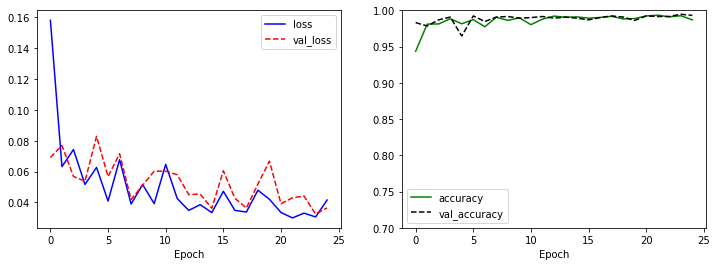

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [11]:
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 585us/step - loss: 0.0277 - accuracy: 0.9962


[0.027698200196027756, 0.9961538314819336]

## 다항 분류

In [12]:
# 와인의 품질: 0~10
# 다항 분류의 범주로 와인의 품질을 사용

print(wine['quality'].describe())
print(wine['quality'].value_counts())

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


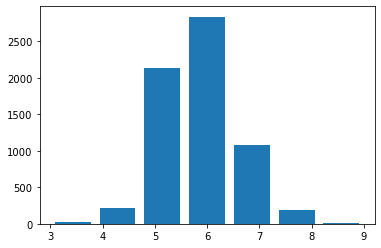

In [13]:
# 와인 품질 히스토그램 시각화

import matplotlib.pyplot as plt

plt.hist(wine['quality'], bins=7, rwidth=0.8)
plt.show()

데이터의 양이 작고, 범주의 수가 너무 많은 데다 각 데이터의 숫자가 차이나기 때문에 모든 범주에 대한 세세한 분류는 어려움 

In [14]:
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2

print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts())

count    6497.000000
mean        0.829614
std         0.731124
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: new_quality, dtype: float64
1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64


In [15]:
# DataFrame loc 연습

data = [['Apple', 11], ['Banana', 23], ['Coconut', 35]]
df = pd.DataFrame(data, columns=['Fruit', 'Count'])
print(df.loc[0,'Fruit'])

Apple


In [16]:
del wine['quality']
wine_backup = wine.copy()
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_norm['new_quality'] = wine_backup['new_quality']
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()

train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=3)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=3)

In [22]:
# 와인 데이터셋 다항 분류 모델 생성 및 학습
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.003), loss='categorical_crossentropy', metrics=['accuracy'])

history= model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/50
122/122 [==============================] - 1s 2ms/step - loss: 1.0369 - accuracy: 0.4600 - val_loss: 1.0091 - val_accuracy: 0.4808
Epoch 2/50
122/122 [==============================] - 0s 959us/step - loss: 0.9501 - accuracy: 0.5278 - val_loss: 0.9263 - val_accuracy: 0.5269
Epoch 3/50
122/122 [==============================] - 0s 1ms/step - loss: 0.8891 - accuracy: 0.5529 - val_loss: 0.8841 - val_accuracy: 0.5669
Epoch 4/50
122/122 [==============================] - 0s 1ms/step - loss: 0.8689 - accuracy: 0.5573 - val_loss: 0.8682 - val_accuracy: 0.5808
Epoch 5/50
122/122 [==============================] - 0s 1ms/step - loss: 0.8778 - accuracy: 0.5579 - val_loss: 0.8595 - val_accuracy: 0.5977
Epoch 6/50
122/122 [==============================] - 0s 1ms/step - loss: 0.8466 - accuracy: 0.5833 - val_loss: 0.8627 - val_accuracy: 0.5862
Epoch 7/50
122/122 [==============================] - 0s 1ms/step - loss: 0.8493 - accuracy: 0.5916 - val_loss: 0.8520 - val_accuracy: 0.5900
Epoc

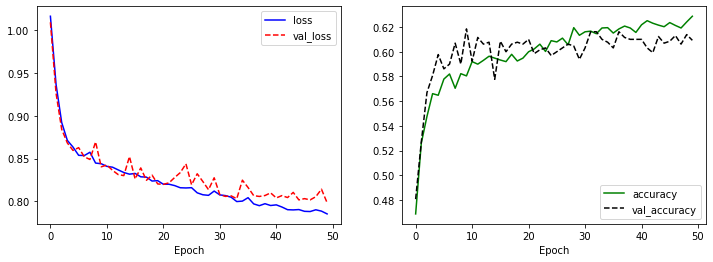

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [24]:
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 643us/step - loss: 0.8419 - accuracy: 0.5708


[0.8418806195259094, 0.5707692503929138]